
<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:Black;
           color:White;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Importation des librairies</h1></div> 


In [57]:
import os
import pandas as pd
from pathlib import Path
import graphviz
from scipy.sparse import coo_matrix
from scipy.sparse import csc_matrix
import time
import statistics
from matplotlib import pyplot as plt
import itertools
import numpy as np
pd.set_option('display.max_columns', None)  


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:Black;
           color:White;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Chargement des fichiers</h1></div> 


In [58]:
def data_import_rollernet(n):
    list = os.listdir(r"./COMPLETEdata/rollernet")
    cpt = 1
    for i in list:
        colnames=['ID1', 'ID2', 'TIME'] 
        file_name = Path(r'./COMPLETEdata/rollernet/'+i).stem
        df = pd.read_csv(r'./COMPLETEdata/rollernet/'+i, names=colnames, sep = ' ')
        df['TIME'] = df['TIME'].div(n).astype(int)
        df = df.drop_duplicates()
        df = df.sort_values(['TIME'], ascending=[False])
        df.to_csv(r'./DataCSV_rollernet/'+file_name+'.csv',index=False,sep = ' ',header=False)
        cpt = cpt + 1

def data_import_lesfurets(n):
    list = os.listdir(r"./COMPLETEdata/lesfurets")
    cpt = 1
    for i in list:
        colnames=['ID1', 'ID2', 'TIME'] 
        file_name = Path(r'./COMPLETEdata/lesfurets/'+i).stem
        df = pd.read_csv(r'./COMPLETEdata/lesfurets/'+i, names=colnames, sep = ' ')
        df['TIME'] = df['TIME'].div(n).astype(int)
        df = df.drop_duplicates()
        df = df.sort_values(['TIME'], ascending=[False])
        df.to_csv(r'./DataCSV_lesfurets/'+file_name+'.csv',index=False,sep = ' ',header=False)
        cpt = cpt + 1

def data_import_enron(n):
    list = os.listdir(r"./COMPLETEdata/enron")
    cpt = 1
    for i in list:
        colnames=['ID1', 'ID2', 'TIME'] 
        file_name = Path(r'./COMPLETEdata/enron/'+i).stem
        df = pd.read_csv(r'./COMPLETEdata/enron/'+i, names=colnames, sep = ' ')
        df['TIME'] = df['TIME'].div(n).astype(int)
        df = df.drop_duplicates()
        df = df.sort_values(['TIME'], ascending=[False])
        df.to_csv(r'./DataCSV_enron/'+file_name+'.csv',index=False,sep = ' ',header=False)
        cpt = cpt + 1


def data_import_Timeprogression(n):
    list = os.listdir(r"./COMPLETEdata/timeprogression")
    cpt = 1
    for i in list:
        colnames=['ID1', 'ID2', 'TIME'] 
        file_name = Path(r'./COMPLETEdata/timeprogression/'+i).stem
        df = pd.read_csv(r'./COMPLETEdata/timeprogression/'+i, names=colnames, sep = ' ')
        df['TIME'] = df['TIME'].div(n).astype(int)
        df = df.drop_duplicates()
        df = df.sort_values(['TIME'], ascending=[False])
        df.to_csv(r'./DataCSV_Timeprogression/'+file_name+'.csv',index=False,sep = ' ',header=False)
        cpt = cpt + 1

In [14]:
n = 25
# data_import_lesfurets(n)
# data_import_enron(n)
# data_import_Timeprogression(n)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:Black;
           color:White;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Csv to DataFrames Tools</h1></div> 


In [59]:
def file_load_rollernet(file_name):
    colnames=['ID1', 'ID2', 'TIME'] 
    df = pd.read_csv(r'./DATACSV_rollernet/'+file_name, names=colnames, sep = ' ')
    return df

def file_load_lesfurets(file_name):
    colnames=['ID1', 'ID2', 'TIME'] 
    df = pd.read_csv(r'./DATACSV_lesfurets/'+file_name, names=colnames, sep = ' ')
    return df

def file_load_enron(file_name):
    colnames=['ID1', 'ID2', 'TIME'] 
    df = pd.read_csv(r'./DATACSV_enron/'+file_name, names=colnames, sep = ' ')
    return df

def file_load_Timeprogression(file_name):
    colnames=['ID1', 'ID2', 'TIME'] 
    df = pd.read_csv(r'./DATACSV_Timeprogression/'+file_name, names=colnames, sep = ' ')
    return df

def get_max_id(df):
    column = df["ID1"]
    max_value1 = column.max()
    column = df["ID2"]
    max_value2 = column.max()
    return max(max_value1,max_value2) + 1 

def get_min_id(df):
    column = df["ID1"]
    min_value1 = column.min()
    column = df["ID2"]
    min_value2 = column.min()
    return max(min_value1,min_value2)

def get_max_T(df):
    return (df["TIME"]).max() + 1 

def get_nb_T(df):
    return len(df['TIME'].unique())
 
def get_min_T(df):
    return (df["TIME"]).min() 

def tree_loader(df, tranche,graph):
    for index, row in df.iterrows(): 
        if row['TIME'] == tranche:
            graph.addTransition(row['ID1'], row['ID2'])
            

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:Black;
           color:White;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> TWINS ALGORITHM CODE </h1></div> 

In [60]:

def group_duplicate_index(df): # Fonction permettant d'obtenir la liste des jumeaux a partir de la matrice d'incidence
    a = df.values
    sidx = np.lexsort(a.T)
    b = a[sidx]
    res = []
    m = np.concatenate(([False], (b[1:] == b[:-1]).all(1), [False] ))
    idx = np.flatnonzero(m[1:] != m[:-1])
    I = df.index[sidx].tolist()
    for i,j in zip(idx[::2],idx[1::2]+1):
        if(len(I[i:j]) >2):
            for i in itertools.combinations(I[i:j], 2):
                res.append(i)    
        else:
            res.append(tuple(I[i:j]))
    return res

#####################################################################################################################################################
#####################################################################################################################################################

def get_tranche_jumeaux(df,t): # obtention des jumeaux par tranche (renvoi la liste des jumeaux pour la tranche t)
    shapeM = 0
    df_par_tranche = df[df['TIME'] == t]
    if not df_par_tranche.empty:
        shapeM = get_max_id(df_par_tranche)
        matrix1 = csc_matrix((np.ones_like(df_par_tranche['ID1']), (df_par_tranche['ID1'].array, df_par_tranche['ID2'].array)),shape=(shapeM, shapeM)).toarray()
        matrix2 = csc_matrix((np.ones_like(df_par_tranche['ID2']), (df_par_tranche['ID2'].array, df_par_tranche['ID1'].array)),shape=(shapeM, shapeM)).toarray()
        matrix = matrix1 + matrix2
        df = pd.DataFrame(data=matrix)
        df = df.loc[(df.sum(axis=1) != 0)]
        twins = group_duplicate_index(df)
        if twins != []:
            return twins
        else:
            return []
    else:
        return []

#####################################################################################################################################################
#####################################################################################################################################################

def get_all_twins(file,max_tranche,bool_maxtranche,data): # Renvoie la liste de tous les jumeaux pour un fichier donner. On peut également decider si on prendre toute les tranches du fichier ou seulement un certain nombre
    all_twins_file=[]
    frames = []
# 0 : rollernet ; 1 : lesfurets ; 2 : enron ; 3 Time execution
    if(data == 0):
        df_file = file_load_rollernet(file)
    if(data == 1):
        df_file = file_load_lesfurets(file)
    if(data == 2):
        df_file = file_load_enron(file)
    if(data == 3):
        df_file = file_load_Timeprogression(file)
    
    col_one_list = ((df_file['TIME'].drop_duplicates()).sort_values()).tolist()

    if(bool_maxtranche):
        col_one_list = col_one_list
    else:
        col_one_list = col_one_list[:max_tranche]
    for t in col_one_list: 
        res = get_tranche_jumeaux(df_file,t)
        l = np.zeros(len(res)).astype(int) + t
        df = pd.DataFrame( {'tranche': l, 'twins': res}) 
        frames.append(df)
    result_file = pd.concat(frames)
    all_twins_file.append(result_file)
        
    return (result_file,get_nb_T(df_file))  

#####################################################################################################################################################
#####################################################################################################################################################

def delta_twins(df,delta): # Renvoi la liste de tous les detlta twins avec le DataFrames des jumeaux pour un certain fichier
    result = []
    is_multi = df["twins"].value_counts() >= delta
    df = df[df["twins"].isin(is_multi[is_multi].index)]
    u = df['twins'].unique()
    if (len(u) == 0):
        return result
    else:
        for i in u:
            s_df = df[ df['twins'] == i ]
            for index, row in s_df.iterrows(): 
                ex_df = s_df.head(delta)
                if((ex_df['tranche'])[1:].equals((ex_df['tranche'].shift() +1)[1:].astype(int))):
                    result.append(row['twins'])
                s_df = s_df[1:]
                if (len((s_df.head(delta)).index) < delta):
                    break                           
    return result    

#####################################################################################################################################################
#####################################################################################################################################################

def eternal_twins(df,max): # Renvoi la liste de tous les eternals twins avec le DataFrames des jumeaux pour un certain fichier
    result = []
    is_multi = df["twins"].value_counts() == max
    df = df[df["twins"].isin(is_multi[is_multi].index)]
    col_one_list = ((df['tranche'].drop_duplicates()).sort_values()).tolist()
    if (len(col_one_list) == 0):
        return result
    else:
        u = df['twins'].unique()
        for twin in u:
            s_df = df[ df['twins'] == twin ]
            if (len((s_df.index)) == max):
                result.append(twin)                           
    return result      

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:Black;
           color:White;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> PHASE DE TESTS </h1></div> 


* **ETERNAL TWINS**


In [61]:
def get_eternalTWINS(file_list,n_file,min_part,max_part,pas,nb_tranche,bool_maxtranche,data):
    res = []
    res_twins = []

    time_execution = []
    mean_twins = []
    n = min_part
    file_list = file_list[:n_file]
    while(n<=max_part):
        print("DATA PARTITION START FOR n = "+str(n))
        # 0 : rollernet ; 1 : lesfurets ; 2 : enron ; 3 Time execution
        if(data == 0):
            data_import_rollernet(n)
        if(data == 1):
            data_import_lesfurets(n)
        if(data == 2):
            data_import_enron(n)
        if(data == 3):
            data_import_Timeprogression(n)
        print("DATA PARTITION DONE FOR n = "+str(n))
        for file in file_list:
            print("     FOR FILE : "+str(file))
            # Début de l'algo 
            start = time.time()
            df,max_value = get_all_twins(file,nb_tranche,bool_maxtranche,data)
            result_eternal = eternal_twins(df,max_value) 
            end = time.time()

            time_execution.append(end-start)
            res.append(len(result_eternal))

            if (len(result_eternal) > 0):
                print("         ETERNAL TWINS FIND in ==> "+str(result_eternal))
            else:
                print("         NO ETERNAL TWINS FIND")
        res_twins.append(statistics.mean(res))
        res = []
        mean = statistics.mean(time_execution)
        time_execution = []
        mean_twins.append(mean)
        n = n + pas
    return (res_twins,mean_twins)

In [52]:
file_list = os.listdir(r"./DataCSV_rollernet/")
# file_list = os.listdir(r"./DataCSV_lesfurets/")
# file_list = os.listdir(r"./DataCSV_enron/")
# file_list = os.listdir(r"./DataCSV_Timeprogression/")
# 0 : rollernet ; 1 : lesfurets ; 2 : enron ; 3 Time execution

# file_list = os.listdir(r"./DataCSV_lesfurets/")

n_file = 100                # Nombre de fichier
min_part = 25               # Nombre de partition minimum 
max_part = 300              # Nombre de partition maxmimum (on garde la valeur de min_part si on veut que cela fasse une seul partition)
pas = 25                    # pas du partitionnement
nb_tranche = 100            # Nombre de tranche minimum a traiter pour chaque fichier (utile si on veut que tous les fichiers aient des traitements égaux)
bool_maxtranche = False     # True si on veut garder toute les tranches pour chaque fichier, False sinon
res_time = []
res_twins = []
# 0 : rollernet ; 1 : lesfurets ; 2 : enron ; 3 Time execution
# l = [0,1,2,3]
l = [0]                     # Liste des fichiers a traiter
for i in l:
    if(i == 0):
        file_list = os.listdir(r"./DataCSV_rollernet/")
        print("FOR ROLLERNET DATA")
    if(i == 1):
        file_list = os.listdir(r"./DataCSV_lesfurets/")
        print("------------------------------------------------------------------------------------------------")
        print("FOR LESFURETS DATA")
    if(i == 2):
        file_list = os.listdir(r"./DataCSV_enron/")
        print("------------------------------------------------------------------------------------------------")
        print("FOR ENRON DATA")
    if(i == 3):
        file_list = os.listdir(r"./DataCSV_Timeprogression/")
        print("------------------------------------------------------------------------------------------------")
        print("FOR TIME PROGRESSION DATA")

    res,time_execution = get_eternalTWINS(file_list,n_file,min_part,max_part,pas,nb_tranche,bool_maxtranche,i)
    res_time.append(time_execution)
    res_twins.append(res)

FOR ROLLERNET DATA


In [38]:
print(res_time)
print(res_twins)

# [0.1400277090072632, 0.13707313537597657, 0.1355713725090027, 0.13580344438552858, 0.11130422830581665, 0.09590006828308105, 0.08565693378448486, 0.07565890789031983, 0.07050649642944336, 0.0622928524017334, 0.05896532773971558, 0.0559347128868103]
[[0.0007577681541442871, 0.0007385730743408204, 0.0007657098770141601, 0.0007633161544799805, 0.000754241943359375, 0.0007346296310424805, 0.0007690954208374024, 0.0006919622421264649, 0.0007486724853515625, 0.0007706952095031739, 0.0007226896286010742, 0.0007232260704040527]]

[[0.0007577681541442871, 0.0007385730743408204, 0.0007657098770141601, 0.0007633161544799805, 0.000754241943359375, 0.0007346296310424805, 0.0007690954208374024, 0.0006919622421264649, 0.0007486724853515625, 0.0007706952095031739, 0.0007226896286010742, 0.0007232260704040527]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


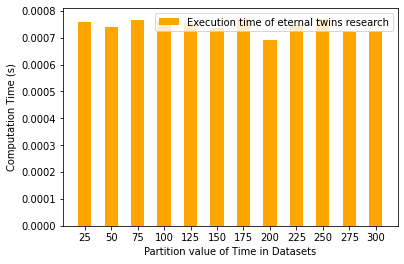

In [46]:
# time_execution = [0.13885868310928345, 0.1370295524597168, 0.13716195821762084, 0.13657954931259156, 0.11521623849868774, 0.0971976637840271, 0.08541079998016357, 0.07530666828155518, 0.06918700218200684, 0.06220374822616577, 0.05940249443054199, 0.05653886318206787]
# time_execution = [0.14503827095031738, 0.13311920166015626, 0.11462595462799072, 0.08181893825531006, 0.06991593837738037, 0.055812716484069824]
res_twins = [0.1400277090072632, 0.13707313537597657, 0.1355713725090027, 0.13580344438552858, 0.11130422830581665, 0.09590006828308105, 0.08565693378448486, 0.07565890789031983, 0.07050649642944336, 0.0622928524017334, 0.05896532773971558, 0.0559347128868103]

res_twins2 = [0.0007577681541442871, 0.0007385730743408204, 0.0007657098770141601, 0.0007633161544799805, 0.000754241943359375, 0.0007346296310424805, 0.0007690954208374024, 0.0006919622421264649, 0.0007486724853515625, 0.0007706952095031739, 0.0007226896286010742, 0.0007232260704040527]


part = [x for x in range(0,12)]

bars = ('25','50','75','100','125','150','175','200','225','250','275','300')

# # plt.hist(valuesx, rwidth=0.7)
# plt.figure(figsize=(20, 10))

# plt.bar(part,res_twins,width=0.5,label='Execution time of get_all_twins function')
plt.bar(part,res_twins2,width=0.5,label='Execution time of eternal twins research',color='orange')

plt.xticks(part, bars)

plt.xlabel('Partition value of Time in Datasets')
plt.ylabel('Computation Time (s)')

plt.legend()
plt.show()

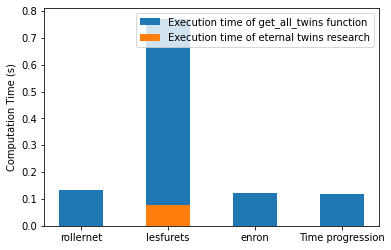

In [29]:
# res_time = [0.5141837894916534, 1.1989525842666626, 10.403328659534454, 7.60277962205398]
res_time = [0.14122190237045287, 0.825146484375, 0.12191760778427124, 0.11721647262573243]
res_twins = [98.24, 173083.7, 30.93, 7.58]
time_execution1 = [0.13523140907287598, 0.7714906477928162, 0.120514395236969, 0.11676268577575684]
time_execution2 = [0.0008417773246765137, 0.07582343816757202, 0.0007525157928466797, 0.0007201385498046875]
part = [x for x in range(0,4)]
bars = ('rollernet','lesfurets','enron','Time progression')
plt.bar(part,time_execution1,width=0.5,label='Execution time of get_all_twins function')
plt.bar(part,time_execution2,width=0.5,label='Execution time of eternal twins research')

plt.xticks(part, bars)
plt.ylabel('Computation Time (s)')
plt.legend()
plt.show()


* **DELTA TWINS**


In [62]:
def get_delta_twins(file_list,n_file,min_delta,max_delta,min_partition,max_partition,pas,nb_tranche,bool_maxtranche,data):
    file_list = file_list[:n_file]
    time_execution = []
    mean_twinsdelta= []
    result_time = []
    res_number_twins = []
    res_number_twins2 = []
    res_number_twinsFINAL= []
    n = min_partition
    delta = min_delta
    cpt = 1
    while(n<=max_partition):
        print("DATA PARTITION START FOR n = "+str(n))
        if(data == 0):
            data_import_rollernet(n)
        # 0 : rollernet ; 1 : lesfurets ; 2 : enron ; 3 Time execution
        if(data == 1):
            data_import_lesfurets(n)
        if(data == 2):
            data_import_enron(n)
        if(data == 3):
            data_import_Timeprogression(n)
        print("DATA PARTITION DONE FOR n = "+str(n))
        
        while(delta <= max_delta):
            print("     FOR DELTA = "+str(delta))
            for file in file_list:
                print("         FOR FILE n'"+str(cpt)+" ==> "+str(file))
                
                start = time.time()

                df,max_value = get_all_twins(file,nb_tranche,bool_maxtranche,data)
                all_delta_twins = delta_twins(df,delta)
                
                end = time.time()
                
                res_number_twins.append(len(all_delta_twins))
                time_execution.append(end-start)
                if (len(all_delta_twins) > 0):
                    print("             DELTA TWINS FIND in ==> "+str(all_delta_twins))
                else:
                    print("             NO DELTA TWINS FIND")
                cpt= cpt + 1      

            cpt=0
            delta = delta + 5  
            res_number_twins2.append(statistics.mean(res_number_twins))
            mean = statistics.mean(time_execution)
            mean_twinsdelta.append(mean)
            time_execution = []
            res_number_twins = []
        delta = min_delta

        res_number_twinsFINAL.append(res_number_twins2)
        result_time.append(mean_twinsdelta)
        
        mean_twinsdelta = []
        res_number_twins2 = []
        
        n = n + pas
    return (res_number_twinsFINAL, result_time)

In [53]:
n_file = 10                 # Nombre de fichier
pas = 50                    # pas du partitionnement
min_partition = 25          # Nombre de partition minimum 
max_partition = 25          # Nombre de partition maxmimum (on garde la valeur de min_part si on veut que cela fasse une seul partition)
min_delta = 2               # Valeur minimum de delta
max_delta = 2               # Valeur delta max allant du min au max (on garde la valeur de min_delta si on veut que cela fasse une seul partition)
nb_tranche = 100            # Nombre de tranche minimum a traiter pour chaque fichier (utile si on veut que tous les fichiers aient des traitements égaux)
bool_maxtranche = False     # True si on veut garder toute les tranches pour chaque fichier, False sinon

res_data = []

# l = [0,1,2,3]
l = [0]                     # Liste des fichiers a traiter
result_time_FINAL = []
result_twins_FINAL = []
for i in l:
    if(i == 0):
        file_list = os.listdir(r"./DataCSV_rollernet/")
        print("FOR ROLLERNET DATA")
    if(i == 1):
        file_list = os.listdir(r"./DataCSV_lesfurets/")
        print("------------------------------------------------------------------------------------------------")
        print("FOR LESFURETS DATA")
    if(i == 2):
        file_list = os.listdir(r"./DataCSV_enron/")
        print("------------------------------------------------------------------------------------------------")
        print("FOR ENRON DATA")
    if(i == 3):
        file_list = os.listdir(r"./DataCSV_Timeprogression/")
        print("------------------------------------------------------------------------------------------------")
        print("FOR TIME PROGRESSION DATA")

    res_twins,res_time = get_delta_twins(file_list,n_file,min_delta,max_delta,min_partition,max_partition,pas,nb_tranche,bool_maxtranche,i)
    result_time_FINAL.append(res_time)
    result_twins_FINAL.append(res_twins)

FOR ROLLERNET DATA


In [210]:
print(result_time_FINAL)
print(result_twins_FINAL)

[[[0.1509026527404785]]]
[[[2.7]]]


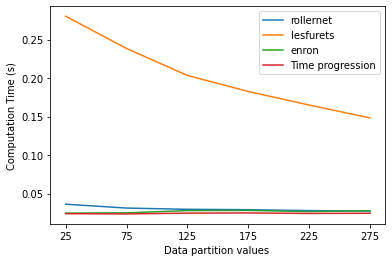

In [152]:
data= [[0.036168248653411866,0.0311566162109375, 0.029537284374237062, 0.029040565490722658, 0.027830886840820312, 0.027323651313781738], [0.28041475772857666, 0.2385264253616333, 0.20350797414779664, 0.18264336347579957, 0.16506234169006348, 0.14830577850341797], [0.024607906341552733, 0.02494971752166748, 0.02789337158203125, 0.028117949962615966, 0.026580915451049805, 0.027687077522277833], [0.023862762451171873, 0.023556535243988038, 0.02456890344619751, 0.024837207794189454, 0.024146361351013182, 0.02442040205001831]]
restwins = [[0, 0, 0, 0, 0, 0], [0.08, 0.15, 0.01, 0, 0.01, 0.02], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

#100  file et delta = 5
part = [x for x in range(0,6)]
v = ('25','75','125','175','225','275')
bars = ['rollernet','lesfurets','enron','Time progression']
n = 25
i = 0
while(n<=200):
    plt.plot(part, data[i],label = bars[i])
    n = n + 50
    i = i + 1
plt.xticks(part, v)
plt.ylabel('Computation Time (s)')
plt.xlabel('Data partition values ')

plt.legend()
plt.show()

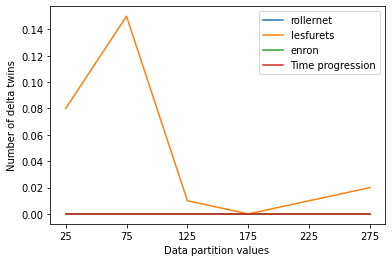

In [157]:
#100  file
part = [x for x in range(0,6)]
v = ('25','75','125','175','225','275')
bars = ['rollernet','lesfurets','enron','Time progression']
n = 25
i = 0
while(n<=200):
    plt.plot(part, restwins[i],label = bars[i])
    n = n + 50
    i = i + 1
plt.xticks(part, v)
# plt.ylabel('the average for 100 files of the number of delta twins with delta = 5')
plt.ylabel('Average number of delta twins')
plt.xlabel('Data partition values ')

plt.legend()
plt.show()

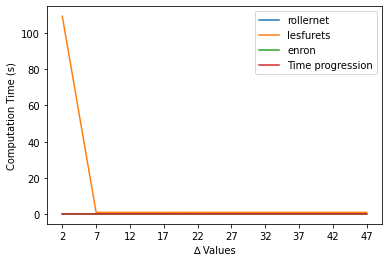

In [48]:

data = [[0.15513947010040283, 0.1374964475631714, 0.14469070434570314, 0.1366229772567749, 0.1373429536819458, 0.14342243671417237, 0.13469934463500977, 0.13482706546783446, 0.13740711212158202, 0.14008305072784424], [109.28075780868531, 0.96854248046875, 0.939164113998413, 0.9260070323944092, 0.9556373357772827, 0.9474948167800903, 0.9422290802001954, 0.942578911781311, 0.9445403099060059, 0.9554536581039429], [0.14542601108551026, 0.13223114013671874, 0.13563065528869628, 0.12643165588378907, 0.12782628536224366, 0.12710320949554443, 0.12741029262542725, 0.14253640174865723, 0.12734506130218506, 0.1260284662246704], [0.13443961143493652, 0.12421267032623291, 0.124031400680542, 0.12128105163574218, 0.13024594783782958, 0.12607712745666505, 0.13538765907287598, 0.12493700981140136, 0.1285686731338501, 0.12768213748931884]]
res_twins = [[2.7, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3669.5, 1.2, 0.1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

part = [x for x in range(0,10)]
v = ('2','7','12','17','22','27','32','37','42','47')
bars = ['rollernet','lesfurets','enron','Time progression']
n = 0
i = 0
while(i<4):
    plt.plot(part, data[i],label = bars[i])
    i = i + 1

plt.xticks(part, v)
# plt.ylabel('the average for 100 files of the number of delta twins with delta = 5')
plt.ylabel('Computation Time (s)')
plt.xlabel('∆ Values')

plt.legend()
plt.show()

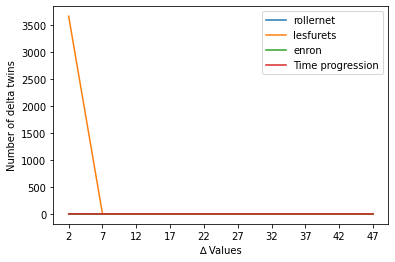

In [181]:
part = [x for x in range(0,10)]
v = ('2','7','12','17','22','27','32','37','42','47')
bars = ['rollernet','lesfurets','enron','Time progression']
n = 0
i = 0
while(i<4):
    plt.plot(part, res_twins[i],label = bars[i])
    i = i + 1

plt.xticks(part, v)
plt.ylabel('Number of delta twins')
plt.xlabel('∆ Values')

plt.legend()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:Black;
           color:White;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Graphe </h1></div> 

In [55]:
# Structure de données

class Graphe:
    
    def __init__(self,nbrSommets):
        self.nbrSommets = nbrSommets
        self.mesSommets = []
        self.transitions = dict()
        for i in range(nbrSommets):
            self.mesSommets.append(i)
            self.transitions[i] = [i]
            
            
       
    def addTransition(self,depart, destination):
        maListeDep = self.transitions[depart]
        if(destination) in maListeDep :
            return 
        else:
            maListeDep.append(destination)
            maListeDes = self.transitions[destination]
            maListeDes.append(depart)
            copy = dict()
            copy[depart] = maListeDep
            copy[destination] = maListeDes
            self.transitions.update(copy)

    def getSommets(self):
        return self.mesSommets

    def getTransitions(self):
        return self.transitions
    
    def setTransitions(self,nouvellesTransitions):
        self.transitions = nouvellesTransitions

    def affichage(self):
        dot = graphviz.Graph('companies',filename='companies.gv')
        
        copyTransitions = self.transitions
        for i in range(self.nbrSommets):
            dot.node(str(i),shape="circle",fixedsize="true", fontname = "Helvetica", width="0.25",
                  color="black", fillcolor="white", style="rounded,filled", fontcolor="darkred", fontsize="12")
    
        for (cle, valeur) in (copyTransitions.items()):
            for elm in valeur:
                if(cle!=elm):
                    dot.edge(str(cle), str(elm),style="rounded,filled")
                    copy = dict()
                    maListeElm = copyTransitions[elm]
                    if(cle in maListeElm):
                        maListeElm.remove(cle)
                        copy[elm] = maListeElm 
                        copyTransitions.update(copy) 
                
        return dot

    def longeur(self):
        copyTransitions = self.transitions
        for (cle, valeur) in (copyTransitions.items()):
            for elm in valeur:
                copy = dict()
                maListeElm = copyTransitions[elm]
                if(cle in maListeElm):
                    maListeElm.remove(cle)
                    copy[elm] = maListeElm 
                    copyTransitions.update(copy) 
        malongeur = 0
        for (cle, valeur) in (copyTransitions.items()):
            malongeur += len(valeur)

        return malongeur
    

In [67]:
df = file_load_rollernet("rollernet.csv")
df

,ID1,ID2,TIME
0,0,1,33
1,10,31,33
2,31,33,33
3,15,40,33
4,15,2,33
...,...,...,...
22479,2,52,0
22480,2,50,0
22481,2,14,0
22482,59,14,0


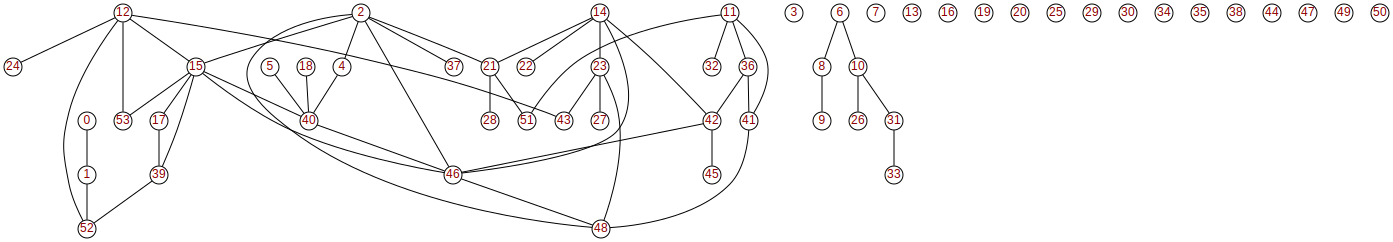

In [68]:
g = Graphe(get_max_id(df.head(50)))

tree_loader(df.head(50),33,g)

g.affichage()